In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split#학습 평가 데이터 분리
import seaborn as sns #matplot과 유사하게 시각화 라이브러리이지만 좀 더 깔끔함
from sklearn.datasets import load_iris #붓꽃 iris
from sklearn.tree import DecisionTreeClassifier #트리
# !pip install seaborn
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder
#!pip install graphviz #시각화 외부라이브러리
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler #StandardScaler
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler
from sklearn.datasets import load_breast_cancer
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 목차보기
from sklearn.model_selection import cross_val_score#교차검증 적용을 위해 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier #앙상블 모델
from sklearn.ensemble import AdaBoostClassifier # 에이다
#!pip install xgboost #XG부스트
#!pip install lightgbm #LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 빨간색 경고창 무시하기
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split #트레인테스트 스플릿
from sklearn.model_selection import GridSearchCV # 그리드서치
from sklearn.model_selection import KFold # cv = kfold
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression#선형회귀 모델 임포트
from sklearn.datasets import load_boston #학습용 보스턴 집 값 데이터를 임포트
from sklearn.metrics import mean_squared_error # mse
from sklearn.linear_model import Lasso # Lasso 임포트
from sklearn.linear_model import Ridge # Ridge 임포트
from sklearn.linear_model import LogisticRegression #로지스틱 임포트
# 한글을 쓰기 위한 코드
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

### Logistic Regression(로지스틱 회귀)모델을 사용해보자!
- 예측값이 0.5보다 작을 경우는 0, 0.5보다 클 경우는 1로 예측(2진분류)

### 와인 데이터를 이용한 이진분류
- 포르투칼의 비뉴 베르드 지방에서 만들어진 와인을 측정한 데이터
- 데이터셋 구성
 - 1599개의 레드와인, 4898개의 화이트와인 데이터(총6497개)
 - 12개의 특성과 1개의 클래스(레이블)로 구성

In [7]:
wine = pd.read_csv("data/wine.csv", header=0) 

In [8]:
wine
# 컬럼들은 대부분 화학성분들로 이루어져 있음
# quality(1~10단계, 1단계가 가장 낮은 등급)
# type(1 : 레드와인, 0 : 화이트와인)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [22]:
# 문제, 정답
# 학습, 평가
X = wine.loc[:, "fixed acidity":"quality"]
y = wine["type"]

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #7 : 3
                                                    random_state = 5
                                                   )

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 12)
(1950, 12)
(4547,)
(1950,)


### 로지스틱회귀 모델 적용

In [51]:
lr_md = LogisticRegression(C=10, max_iter=10000)
# C : alpha값의 역수, 디폴트는 1, 낮을수록 규제가 강해진다.(과대적합이 해소된다)
# max_iter : 경사하강법으로 학습하는 최대 횟수(디폴트 : 100)
# max_iter를 낮게 잡아주면 경고창이 뜨며 학습이 완전히 진행되지 않고 중간에 끊김
# max_iter를 높게 잡는다고 해서 성능이 달라지지 않음
# (경사하강법으로 w, b값이 최적값에 수렴하면 횟수를 늘려도 성능이 오르지 않음)

In [52]:
lr_md.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000)

In [53]:
lr_md.score(X_train, y_train)

0.9892236639542555

In [54]:
lr_md.score(X_test, y_test)

0.9861538461538462

In [55]:
print("train - test 정확도 차이 :", lr_md.score(X_train, y_train) - lr_md.score(X_test, y_test))

train - test 정확도 차이 : 0.00306981780040938


### 최적의 c 값을 찾아보자

In [57]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# 정확도 값을 담아줄 빈 리스트들을 생성
train_acc = []
test_acc = []

for i in c_list :
    lr_md = LogisticRegression(C = i, max_iter=10000)
    lr_md.fit(X_train, y_train)
    
    lr_score_train = lr_md.score(X_train, y_train)
    lr_score_test = lr_md.score(X_test, y_test)
    
    train_acc.append(lr_score_train)
    test_acc.append(lr_score_test)

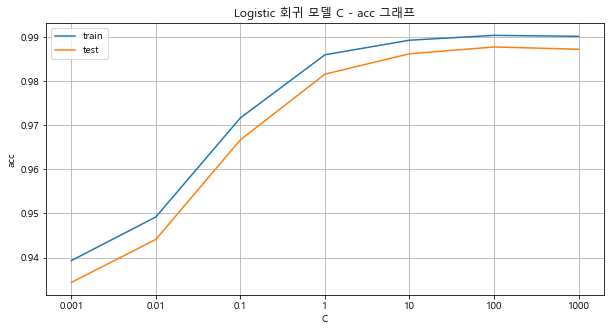

In [69]:
plt.figure(figsize=(10,5))
plt.plot(train_acc, label="train") # train 그래프
plt.plot(test_acc, label="test")   # test  그래프
plt.title("Logistic 회귀 모델 C - acc 그래프") # 그래프 제목
plt.xlabel("C")
plt.xticks(np.arange(7), c_list)      # x축 값 설정(x축 값의 개수, 바꿔줄 값)
plt.ylabel("acc")
plt.grid()
plt.legend()
plt.show()

# 상세내용은 09번째 실습 코드를 참고할것

### GridSearchCV를 이용해보자!

In [61]:
param_grid = {"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [66]:
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv = 5
                          )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [67]:
print("최적 하이퍼파라미터 : ", grid_search.best_params_)
print("최고 교차 검증 점수 : ", grid_search.best_score_)

최적 하이퍼파라미터 :  {'C': 1000}
최고 교차 검증 점수 :  0.9813082846746213
